C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel
C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel
C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel
C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel
C:\Users\gelli\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel


FunctionsOpaque.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inputWalls["Rvalue"][index] = materials["R"][currentMterialID]
FunctionsOpaque.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inputWalls["Rvalue"][index] = materials["R"][currentMterialID] * inputWalls["lenght"][index] / materials["Thickness"][currentMterialID]
FunctionsOpaque.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  opaque_DataFrame["Area"]["Walls"]= opaque_DataFrame["width"]["Walls"] *opaque_DataFr

	This is the opaque heating load: 2407.28367694 W


This is the value of Uwall_summer: 0.43528869677  W/(m^2 * K)
This is the value of Udoor_summer: 1.65562913907  W/(m^2 * K)
	This is the opaque heating load: 2407.28367694 W

The total amount of the heating load for the windows is 1269.7848 W.


fenestration_functions.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  WindowsDataFrame["Tx"][index] = 1
fenestration_functions.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  WindowsDataFrame["Tx"][index] = 0.64
fenestration_functions.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  WindowsDataFrame["Fshd"][index] = min([1,max([0,((SLF_currentvalue*WindowsDataFrame["Doh"][index]-WindowsDataFrame["Xoh"][index])/WindowsDataFrame["Height"][index])])])


The interior shading for this window is not included in the library
The interior shading for this window is not included in the library
The interior shading for this window is not included in the library
The interior shading for this window is not included in the library


fenestration_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  WindowsDataFrame["IAC"][index] = 1.0+WindowsDataFrame["Fcl"][index]*(IACcl-1.0)


The total amount of the cooling load for the windows is 1848.94495772 W.
			 So the total Sensible Heating Load is :6926.81118734 W.
			 So the total Sensible Cooling Load is :4937.53594993 W.

Here is given a table with all the results:

                         Heating      Cooling
Loads                                        
Q_opaque             2407.283677  1071.441219
Q_windows            1269.784800  1848.944958
Q_below                 0.000000     0.000000
Q_internalGain          0.000000   540.800000
Q_infiltVentilation  2294.742710   427.349773
Q_distribLosses       955.000000  1049.000000
Q_sensible_tot       6926.811187  4937.535950
Q_latent                0.000000   610.200309

This is the value of Uwall_winter: 0.351171230667  W/(m^2 * K)
	This is the opaque heating load: 2174.45707723 W


This is the value of Uwall_summer: 0.34923263622  W/(m^2 * K)
	This is the opaque heating load: 2174.45707723 W

			 So the total Sensible Heating Load is :6656.98458763 W.
			 So the t

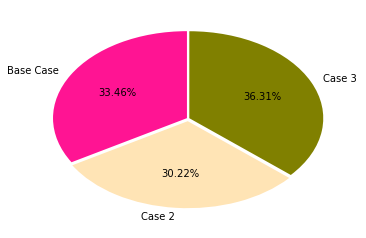

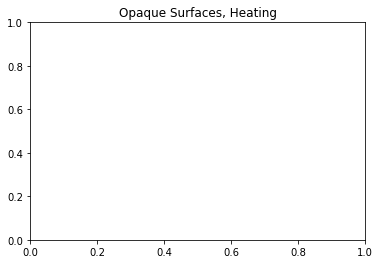

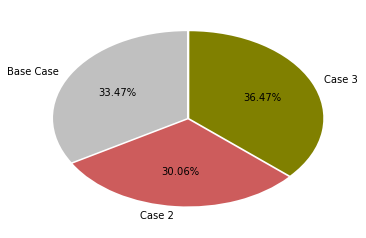

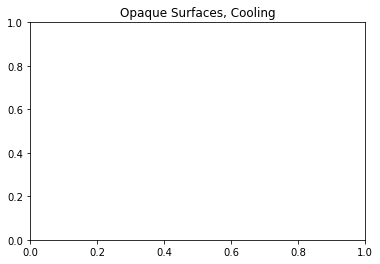

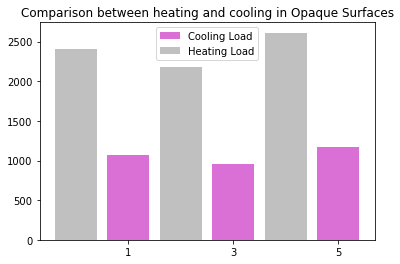

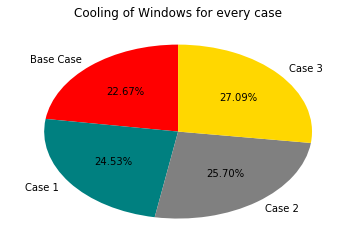

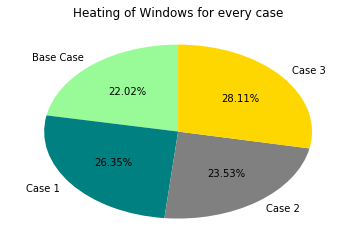

([<matplotlib.axis.XTick at 0xc56aba8>,
 <a list of 4 Text xticklabel objects>)

In [1]:
#Importing all the files of the previous code in my folder 

import os
import sys
os.chdir(r"C:\Users\gelli\Desktop\POLIMI FIRST YEAR\ENERGY AND ENVIRONMENTAL SYSTEM FOR BUILDINGS\Files solved in Python\Assignment 8\example3_assignment8")
ThisFileDirectory=os.path.dirname(sys.argv[0])
os.chdir(ThisFileDirectory)
print os.getcwd()

Folderofmywallcalculation=r"C:\Users\gelli\Desktop\POLIMI FIRST YEAR\ENERGY AND ENVIRONMENTAL SYSTEM FOR BUILDINGS\Files solved in Python\Assignment 8\example3_assignment8"

import os
os.chdir(Folderofmywallcalculation)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import fenestration_functions as func
import IntGains_Inf_Vent_DistrLosses as iv
import FunctionsOpaque as funcOp
import psySI as SI
import latent_functions as lat

#Weather Inputs:

inputs_DF = pd.read_csv("input_weather_Piacenza.csv",sep=";",index_col=0) #taking weather data for Piacenza and putting into data frame
inputs_list = func.weather_data_calculator(inputs_DF) #makes list of delta Theat, delta Tcool, DR, latitude, specific humidity (taken from fenestration_functions)


# Opaque surfaces Calculation:
numericalDataDF = pd.read_csv("input_numerical_data.csv",sep=";",index_col= 0)   #taking geometrical dimensions of house, putting into data frame
dataDF = pd.read_csv("input_data.csv",sep=";",index_col= 0) #types of material, colour and type of roof, necessary data for opaque cooling calculations
materials_DataFrame = pd.read_csv("resistences_materials.csv",sep=";",index_col= 1)   # taking materials and resistances into data frame
inputWalls_DataFrame_winter = pd.read_csv("input_data_walls_winter.csv",sep=";",index_col= 0) #all layers,fraction of area, their resistance for winter calculcations of Uwall,winter 
inputWalls_DataFrame_summer = pd.read_csv("input_data_walls_summer.csv",sep=";",index_col= 0)#all layers,fraction of area, their resistance for winter calculcations of Uwall,summer
inputDoor_DataFrame_winter = pd.read_csv("input_data_door_winter.csv",sep=";",index_col= 0) #name,type,area percentage for calculation Udoor,winter
inputDoor_DataFrame_summer = pd.read_csv("input_data_door_summer.csv",sep=";",index_col= 0)#name,type,area percentage for calculation Udoor,summer
    
U_wall_winter = funcOp.Utot_wall_Calculator(inputWalls_DataFrame_winter,materials_DataFrame) #putting all layers with AreaFrac=1 in series. Adding those with AF!=1,calculating Uparallel with series layers and adding them into new array of parallel layers, which are summed on the end
U_wall_summer = funcOp.Utot_wall_Calculator(inputWalls_DataFrame_summer,materials_DataFrame) #same as for winter, just taking different data frame(that for summer) 
U_door_winter = funcOp.Utot_door_Calculator(inputDoor_DataFrame_winter,materials_DataFrame) #same as for wall, just taking data for door and for winter in this case
U_door_summer = funcOp.Utot_door_Calculator(inputDoor_DataFrame_summer,materials_DataFrame) #calculating Udoor,summer 


QtotOpaque_winter = funcOp.QtotOpaque_winter_calculator(numericalDataDF["value"]["height_windows"],numericalDataDF["value"]["width_windowsS"],numericalDataDF["value"]["width_windowsE"],numericalDataDF["value"]["width_windowsW"],U_wall_winter,numericalDataDF["value"]["U_ceiling"],U_door_winter,inputs_list["deltaTheating"]) #calculation of heating loadings for opaque surfaces
print "\tThis is the opaque heating load: " + str(QtotOpaque_winter) + " W\n"

print "\nThis is the value of Uwall_summer: " + str(U_wall_summer) + "  W/(m^2 * K)"
print "This is the value of Udoor_summer: " + str(U_door_summer) + "  W/(m^2 * K)"
QtotOpaque_summer = funcOp.QtotOpaque_summer_calculator(numericalDataDF["value"]["height_windows"],numericalDataDF["value"]["width_windowsS"],numericalDataDF["value"]["width_windowsE"],numericalDataDF["value"]["width_windowsW"],U_wall_summer,numericalDataDF["value"]["U_ceiling"],U_door_summer,dataDF["characteristic"]["colour_roof"],dataDF["characteristic"]["material_roof"],inputs_list["deltaTcooling"],inputs_list["DRcooling"],dataDF["characteristic"]["walls_surface_type"],dataDF["characteristic"]["ceiling_surface_type"],dataDF["characteristic"]["doors_surface_type"])
#calculation of heating loadings for opaque surfaces (first calculation of areas using function,calculation of OFb,OFt, OFr, calculation of CF, and finally calculation of cooling loads for opaque surfaces
print "\tThis is the opaque heating load: " + str(QtotOpaque_winter) + " W\n"

#Fenestration surfaces Calculation:
windows_DF = pd.read_csv("input_fenestration.csv",sep=";",index_col=0) #Taking data for windows(height,width, type of glass..) into DataFrame
windows_DF["Area"] = windows_DF["Height"]*windows_DF["Width"] #calculation of Area of Windows

Qfen_heating_load = func.Qfen_heating_calculator(windows_DF,inputs_list) #calculation of Qheating of walls 
print 'The total amount of the heating load for the windows is '+str(Qfen_heating_load)+' W.'
Qfen_cooling_load = func.Qfen_cooling_calculator(windows_DF,inputs_list) #Calculation of PXI,FFs,IAC. After that calculation of CF and finally calculation of Qcooling for fenestrials
print 'The total amount of the cooling load for the windows is '+str(Qfen_cooling_load)+' W.'
#windows_DF.to_csv("results_fenestration.csv",sep =";")


#Infiltration, Ventilation and Distribution losses Calculation:
input_data_inf_vent = pd.read_csv("input_inf_vent.csv",sep = ";",index_col=0) #taking values that are needed for calculation heating and cooling loads for inf+vent and internal gains
Output_Inf_Vent = iv.inf_vent_load_calc(input_data_inf_vent)#calculation of total inf+vent air flow in summer and winter,and calculation of heating and cooling loads for inf +vent and internal gains (just cooling)

input_data_distribution = pd.read_csv("input_distribution.csv",sep = ";",index_col=0)  #list of type of cooling and heating system that is used, rated leakage,number of stories (needed for calculation coefficient for distributive losses)
Losses = iv.Q_distri_Losses(input_data_distribution,Qfen_heating_load,Qfen_cooling_load,QtotOpaque_winter,QtotOpaque_summer,Output_Inf_Vent.iloc[7][0],Output_Inf_Vent.iloc[6][0],Output_Inf_Vent.iloc[8][0]) #calculation of distributive losses

#Latent results
QtotLatent = lat.Qtot_latent (input_data_inf_vent, inputs_list) #summing latent loads (for cooling)

#Final Results
results_DF = pd.read_csv("results_empty.csv",sep=";",index_col=0)     #put all the results in a data frame
results_DF["Heating"] = [QtotOpaque_winter,Qfen_heating_load,0,0,Output_Inf_Vent.iloc[7][0],Losses.iloc[0][0],0,0] 
results_DF["Cooling"] = [QtotOpaque_summer,Qfen_cooling_load,0,Output_Inf_Vent.iloc[8][0],Output_Inf_Vent.iloc[6][0],Losses.iloc[1][0],0,QtotLatent]
for column in results_DF.columns.tolist():
    sensible_loads = pd.Series(results_DF[column][0:6])     #6 not included
    results_DF[column]["Q_sensible_tot"] = sensible_loads.sum() #sum of all sensible and put it in the table
results_DF.to_csv("results_wholeRFL_case1.csv",sep =";") #updating excel file for results





print "\t\t\t So the total Sensible Heating Load is :"+str(results_DF["Heating"]["Q_sensible_tot"])+" W."      
print "\t\t\t So the total Sensible Cooling Load is :"+str(results_DF["Cooling"]["Q_sensible_tot"])+" W.\n"      
print "Here is given a table with all the results:\n"
print results_DF

#CASE 2: Gypsum instead of common brick
# Opaque surfaces Calculation:
inputWalls_DataFrame_winter1 = pd.read_csv("input_data_walls_winter_case2.csv",sep=";",index_col= 0) #all layers,fraction of area, their resistance for winter calculcations of Uwall,winter 
inputWalls_DataFrame_summer1 = pd.read_csv("input_data_walls_summer_case2.csv",sep=";",index_col= 0)#all layers,fraction of area, their resistance for winter calculcations of Uwall,summer
   
U_wall_winter1 = funcOp.Utot_wall_Calculator(inputWalls_DataFrame_winter1,materials_DataFrame) #putting all layers with AreaFrac=1 in series. Adding those with AF!=1,calculating Uparallel with series layers and adding them into new array of parallel layers, which are summed on the end
U_wall_summer1 = funcOp.Utot_wall_Calculator(inputWalls_DataFrame_summer1,materials_DataFrame) #same as for winter, just taking different data frame(that for summer) 

print "\nThis is the value of Uwall_winter: " + str(U_wall_winter1) + "  W/(m^2 * K)"
QtotOpaque_winter1 = funcOp.QtotOpaque_winter_calculator(numericalDataDF["value"]["height_windows"],numericalDataDF["value"]["width_windowsS"],numericalDataDF["value"]["width_windowsE"],numericalDataDF["value"]["width_windowsW"],U_wall_winter1,numericalDataDF["value"]["U_ceiling"],U_door_winter,inputs_list["deltaTheating"]) #calculation of heating loadings for opaque surfaces
print "\tThis is the opaque heating load: " + str(QtotOpaque_winter1) + " W\n"

print "\nThis is the value of Uwall_summer: " + str(U_wall_summer1) + "  W/(m^2 * K)"
QtotOpaque_summer1 = funcOp.QtotOpaque_summer_calculator(numericalDataDF["value"]["height_windows"],numericalDataDF["value"]["width_windowsS"],numericalDataDF["value"]["width_windowsE"],numericalDataDF["value"]["width_windowsW"],U_wall_summer1,numericalDataDF["value"]["U_ceiling"],U_door_summer,dataDF["characteristic"]["colour_roof"],dataDF["characteristic"]["material_roof"],inputs_list["deltaTcooling"],inputs_list["DRcooling"],dataDF["characteristic"]["walls_surface_type"],dataDF["characteristic"]["ceiling_surface_type"],dataDF["characteristic"]["doors_surface_type"])
#calculation of heating loadings for opaque surfaces (first calculation of areas using function,calculation of OFb,OFt, OFr, calculation of CF, and finally calculation of cooling loads for opaque surfaces
print "\tThis is the opaque heating load: " + str(QtotOpaque_winter1) + " W\n"

#Infiltration, Ventilation and Distribution losses Calculation:

input_data_distribution = pd.read_csv("input_distribution.csv",sep = ";",index_col=0)  #list of type of cooling and heating system that is used, rated leakage,number of stories (needed for calculation coefficient for distributive losses)
Losses1 = iv.Q_distri_Losses(input_data_distribution,Qfen_heating_load,Qfen_cooling_load,QtotOpaque_winter1,QtotOpaque_summer1,Output_Inf_Vent.iloc[7][0],Output_Inf_Vent.iloc[6][0],Output_Inf_Vent.iloc[8][0]) #calculation of distributive losses


#Final Results
results_DF_case2 = pd.read_csv("results_empty.csv",sep=";",index_col=0)     #put all the results in a data frame
results_DF_case2["Heating"] = [QtotOpaque_winter1,Qfen_heating_load,0,0,Output_Inf_Vent.iloc[7][0],Losses1.iloc[0][0],0,0] 
results_DF_case2["Cooling"] = [QtotOpaque_summer1,Qfen_cooling_load,0,Output_Inf_Vent.iloc[8][0],Output_Inf_Vent.iloc[6][0],Losses1.iloc[1][0],0,QtotLatent]
for column in results_DF_case2.columns.tolist():
    sensible_loads1 = pd.Series(results_DF_case2[column][0:6])     #6 not included
    results_DF_case2[column]["Q_sensible_tot"] = sensible_loads1.sum() #sum of all sensible and put it in the table
results_DF_case2.to_csv("results_wholeRFL_case2.csv",sep =";")
print "\t\t\t So the total Sensible Heating Load is :"+str(results_DF_case2["Heating"]["Q_sensible_tot"])+" W."      
print "\t\t\t So the total Sensible Cooling Load is :"+str(results_DF_case2["Cooling"]["Q_sensible_tot"])+" W.\n"      
print "Here is given a table with all the results:\n"
print results_DF_case2

#Case 3: Using Face brick instead of common brick, and removing wood fiber layer
# Opaque surfaces Calculation:
inputWalls_DataFrame_winter2 = pd.read_csv("input_data_walls_winter_case3.csv",sep=";",index_col= 0) #all layers,fraction of area, their resistance for winter calculcations of Uwall,winter 
inputWalls_DataFrame_summer2 = pd.read_csv("input_data_walls_summer_case3.csv",sep=";",index_col= 0)#all layers,fraction of area, their resistance for winter calculcations of Uwall,summer
   
U_wall_winter2 = funcOp.Utot_wall_Calculator(inputWalls_DataFrame_winter2,materials_DataFrame) #putting all layers with AreaFrac=1 in series. Adding those with AF!=1,calculating Uparallel with series layers and adding them into new array of parallel layers, which are summed on the end
U_wall_summer2 = funcOp.Utot_wall_Calculator(inputWalls_DataFrame_summer2,materials_DataFrame) #same as for winter, just taking different data frame(that for summer) 

print "\nThis is the value of Uwall_winter: " + str(U_wall_winter2) + "  W/(m^2 * K)"
QtotOpaque_winter2 = funcOp.QtotOpaque_winter_calculator(numericalDataDF["value"]["height_windows"],numericalDataDF["value"]["width_windowsS"],numericalDataDF["value"]["width_windowsE"],numericalDataDF["value"]["width_windowsW"],U_wall_winter2,numericalDataDF["value"]["U_ceiling"],U_door_winter,inputs_list["deltaTheating"]) #calculation of heating loadings for opaque surfaces
print "\tThis is the opaque heating load: " + str(QtotOpaque_winter2) + " W\n"

print "\nThis is the value of Uwall_summer: " + str(U_wall_summer2) + "  W/(m^2 * K)"
QtotOpaque_summer2 = funcOp.QtotOpaque_summer_calculator(numericalDataDF["value"]["height_windows"],numericalDataDF["value"]["width_windowsS"],numericalDataDF["value"]["width_windowsE"],numericalDataDF["value"]["width_windowsW"],U_wall_summer2,numericalDataDF["value"]["U_ceiling"],U_door_summer,dataDF["characteristic"]["colour_roof"],dataDF["characteristic"]["material_roof"],inputs_list["deltaTcooling"],inputs_list["DRcooling"],dataDF["characteristic"]["walls_surface_type"],dataDF["characteristic"]["ceiling_surface_type"],dataDF["characteristic"]["doors_surface_type"])
#calculation of heating loadings for opaque surfaces (first calculation of areas using function,calculation of OFb,OFt, OFr, calculation of CF, and finally calculation of cooling loads for opaque surfaces
print "\tThis is the opaque heating load: " + str(QtotOpaque_winter2) + " W\n"

#Infiltration, Ventilation and Distribution losses Calculation:

input_data_distribution = pd.read_csv("input_distribution.csv",sep = ";",index_col=0)  #list of type of cooling and heating system that is used, rated leakage,number of stories (needed for calculation coefficient for distributive losses)
Losses2 = iv.Q_distri_Losses(input_data_distribution,Qfen_heating_load,Qfen_cooling_load,QtotOpaque_winter2,QtotOpaque_summer2,Output_Inf_Vent.iloc[7][0],Output_Inf_Vent.iloc[6][0],Output_Inf_Vent.iloc[8][0]) #calculation of distributive losses


#Final Results
results_DF_case3 = pd.read_csv("results_empty.csv",sep=";",index_col=0)     #put all the results in a data frame
results_DF_case3["Heating"] = [QtotOpaque_winter2,Qfen_heating_load,0,0,Output_Inf_Vent.iloc[7][0],Losses2.iloc[0][0],0,0] 
results_DF_case3["Cooling"] = [QtotOpaque_summer2,Qfen_cooling_load,0,Output_Inf_Vent.iloc[8][0],Output_Inf_Vent.iloc[6][0],Losses2.iloc[1][0],0,QtotLatent]
for column in results_DF_case3.columns.tolist():
    sensible_loads3 = pd.Series(results_DF_case3[column][0:6])     #6 not included
    results_DF_case3[column]["Q_sensible_tot"] = sensible_loads3.sum() #sum of all sensible and put it in the table
results_DF_case3.to_csv("results_wholeRFL_case3.csv",sep =";")
print "\t\t\t So the total Sensible Heating Load is :"+str(results_DF_case3["Heating"]["Q_sensible_tot"])+" W."      
print "\t\t\t So the total Sensible Cooling Load is :"+str(results_DF_case3["Cooling"]["Q_sensible_tot"])+" W.\n"      
print "Here is given a table with all the results:\n"
print results_DF_case3
labels_heatingwalls=["Base Case","Case 2","Case 3"];
color4=["deeppink","moccasin","olive"];
plt.figure()
fig1=plt.pie([QtotOpaque_winter,QtotOpaque_winter1,QtotOpaque_winter2] ,labels=labels_heatingwalls,colors=color4,startangle=90,explode=(0.01,0.03,0.01),autopct="%0.2f%%")
plt.show(fig1)
plt.title("Opaque Surfaces, Heating")
labels_coolingwalls=["Base Case","Case 2","Case 3"];
color5=["silver","indianred","olive"];
plt.figure()
fig2=plt.pie([QtotOpaque_summer,QtotOpaque_summer1,QtotOpaque_summer2] ,labels=labels_coolingwalls,colors=color5,startangle=90,explode=(0.01,0.01,0.01),autopct="%0.2f%%")
plt.show(fig2)
plt.title("Opaque Surfaces, Cooling")
items1=[1,3,5]
items2=[2,4,6]
labels=["Base Case", "Case 2","Case 3"]
heatingload=[QtotOpaque_winter,QtotOpaque_winter1,QtotOpaque_winter2]
coolingload=[QtotOpaque_summer,QtotOpaque_summer1,QtotOpaque_summer2]
fig3= plt.figure()
plt.bar(items2, coolingload, label= "Cooling Load",color="orchid")
plt.bar(items1, heatingload, label= "Heating Load", color="silver")
plt.legend()
plt.title("Comparison between heating and cooling in Opaque Surfaces")
plt.xticks(items2,items1)


#After a consultation with a professor, for case 4 and for all fenestration, I will use program Piacenza_basecase for all cases, write results into different csv files, and after that will read them in this program
#For a case 4, instead of gypsum 13mm we are taking urethane with length of 50 mm
U_case4= pd.read_csv("u_values_case4.csv",sep=";")
U_wall_winter3=U_case4["Heating"][0] #value of Uwinter,wall for case 4
U_wall_summer3=U_case4["Cooling"][0]# value of Usummer, wall for case 4
results_case4=pd.read_csv("results_wholeRFL_case4.csv",sep=";",index_col=0) 
Q_heating4=results_case4["Heating"]["Q_sensible_tot"] #value of Qheating for case 4
Q_cooling4=results_case4["Cooling"]["Q_sensible_tot"] #value of Qcooling for case 4


#Now I am starting with changing values of fenestrations 
#Case 2: Using type of windows 5a with wood frame, Case 3: Using type 1a with aluminium frame,  Case 4: ID 1c , wood 
U_fen2= pd.read_csv("u_windows_fenestration2.csv",sep=";") #taking just the value of fixed windows. I will plot Qtot=f(Ufixed)
U_fen3= pd.read_csv("u_windows_fenestration3.csv",sep=";")
U_fen4= pd.read_csv("u_windows_fenestration4.csv",sep=";")
results_fen2=pd.read_csv("results_wholeRFL_fen2.csv",sep=";",index_col=0) 
results_fen3=pd.read_csv("results_wholeRFL_fen3.csv",sep=";",index_col=0) 
results_fen4=pd.read_csv("results_wholeRFL_fen4.csv",sep=";",index_col=0) 
labels_cooling=["Base Case","Case 1","Case 2" ,"Case 3"];
color=["red","teal","gray", "gold"];
plt.figure()
fig15=plt.pie([results_DF["Cooling"]["Q_sensible_tot"],results_fen4["Cooling"]["Q_sensible_tot"],results_fen2["Cooling"]["Q_sensible_tot"],results_fen3["Cooling"]["Q_sensible_tot"]] ,labels=labels_cooling,colors=color,startangle=90,autopct="%0.2f%%")
plt.title("Cooling of Windows for every case")
plt.show(fig15)
labels_heatingwindow= ["Base Case","Case 1","Case 2" ,"Case 3"];
color2=["palegreen","teal","gray", "gold"];
plt.figure()
fig16=plt.pie([results_DF["Heating"]["Q_sensible_tot"],results_fen4["Heating"]["Q_sensible_tot"],results_fen2["Heating"]["Q_sensible_tot"],results_fen3["Heating"]["Q_sensible_tot"]] ,labels=labels_heatingwindow,colors=color2,startangle=90,autopct="%0.2f%%")
plt.title("Heating of Windows for every case")
plt.show(fig16)
items3=[1,3,5,7]
items4=[2,4,6,8]
labels=["Base Case","Case 1","Case 2" ,"Case 3"];
heatingload=[results_DF["Heating"]["Q_sensible_tot"],results_fen4["Heating"]["Q_sensible_tot"],results_fen2["Heating"]["Q_sensible_tot"],results_fen3["Heating"]["Q_sensible_tot"]]
coolingload=[results_DF["Cooling"]["Q_sensible_tot"],results_fen4["Cooling"]["Q_sensible_tot"],results_fen2["Cooling"]["Q_sensible_tot"],results_fen3["Cooling"]["Q_sensible_tot"]]
fig17= plt.figure()
plt.bar(items4, coolingload, label= "Cooling Load",color="firebrick")
plt.bar(items3, heatingload, label= "Heating Load", color="wheat")
plt.legend()
plt.title("Comparison between Heating and Cooling in Windows")
plt.xticks(items3,items4)


